In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
train_data = pd.read_csv("GDU_20200.csv")

In [9]:
train_data.shape

(20200, 785)

In [10]:
train_data.head()

,Label,0 0,0 1,0 2,0 3,0 4,0 5,0 6,0 7,0 8,...,27 18,27 19,27 20,27 21,27 22,27 23,27 24,27 25,27 26,27 27
0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,0,0,0,0
1,1,0,8,0,4,0,0,0,1,0,...,0,1,3,5,6,8,5,5,5,5
2,2,0,0,0,2,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,242,255,255,252,255,255,252,255,255,...,255,255,255,255,255,255,255,255,255,255
4,4,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,2,2,2,2


In [12]:
train_data.isnull().sum().head(10)

Label    0
0 0      0
0 1      0
0 2      0
0 3      0
0 4      0
0 5      0
0 6      0
0 7      0
0 8      0
dtype: int64

In [13]:
train_data.describe()

,Label,0 0,0 1,0 2,0 3,0 4,0 5,0 6,0 7,0 8,...,27 18,27 19,27 20,27 21,27 22,27 23,27 24,27 25,27 26,27 27
count,20200.000000,20200.000000,20200.000000,20200.000000,20200.000000,20200.000000,20200.000000,20200.000000,20200.000000,20200.000000,...,20200.000000,20200.000000,20200.000000,20200.000000,20200.000000,20200.000000,20200.000000,20200.000000,20200.000000,20200.000000
mean,4.500000,52.097772,52.810149,52.631139,52.584208,52.389109,52.566683,52.564455,52.552030,52.756386,...,48.800693,49.111683,48.927475,48.475792,48.845099,48.922822,48.977475,49.325248,50.224851,50.790198
std,2.872352,77.940197,80.679017,81.601449,81.941126,81.392021,81.979212,82.135518,82.009204,82.331424,...,81.861477,82.575505,82.354761,81.534496,82.576784,82.574629,82.389420,82.278630,81.983661,81.840427
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,10.000000,10.000000
50%,4.500000,17.000000,17.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,15.000000,15.000000,16.000000,16.000000
75%,7.000000,48.000000,47.000000,47.000000,46.250000,47.000000,46.250000,47.000000,47.000000,47.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,33.000000,35.000000,37.000000
max,9.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [15]:
print("Dimensions: ",train_data.shape, "\n")
train_data.head()

Dimensions:  (20200, 785) 



,Label,0 0,0 1,0 2,0 3,0 4,0 5,0 6,0 7,0 8,...,27 18,27 19,27 20,27 21,27 22,27 23,27 24,27 25,27 26,27 27
0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,0,0,0,0
1,1,0,8,0,4,0,0,0,1,0,...,0,1,3,5,6,8,5,5,5,5
2,2,0,0,0,2,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,242,255,255,252,255,255,252,255,255,...,255,255,255,255,255,255,255,255,255,255
4,4,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,2,2,2,2


In [16]:
print(train_data.columns)

Index(['Label', '0 0', '0 1', '0 2', '0 3', '0 4', '0 5', '0 6', '0 7', '0 8',
       ...
       '27 18', '27 19', '27 20', '27 21', '27 22', '27 23', '27 24', '27 25',
       '27 26', '27 27'],
      dtype='object', length=785)


In [19]:
order = list(np.sort(train_data['Label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


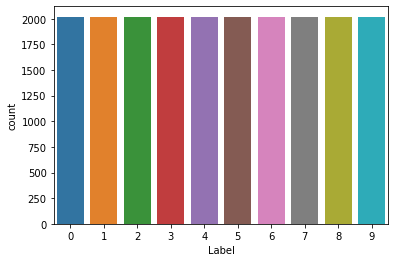

In [20]:
sns.countplot(train_data["Label"])

AttributeError: 'DataFrame' object has no attribute 'label'

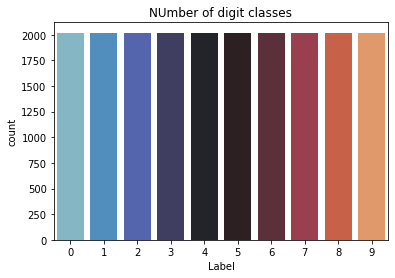

In [22]:
plt.plot(figure = (16,10))
g = sns.countplot( train_data["Label"], palette = 'icefire')
plt.title('NUmber of digit classes')
train_data.label.astype('category').value_counts()

In [25]:
round(train_data.drop('Label', axis=1).mean(), 2)

0 0      52.10
0 1      52.81
0 2      52.63
0 3      52.58
0 4      52.39
         ...  
27 23    48.92
27 24    48.98
27 25    49.33
27 26    50.22
27 27    50.79
Length: 784, dtype: float64

In [26]:
y = train_data['Label']

In [27]:
X = train_data.drop(columns = 'Label')

In [28]:
print(train_data.shape)

(20200, 785)


In [30]:
X = X/255.0
print("X:", X.shape)

X: (20200, 784)


In [31]:
from sklearn.preprocessing import scale
X_scaled = scale(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)

In [33]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
y_pred = model_linear.predict(X_test)

In [35]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.3264026402640264 

[[286  44  85  13  36  35  26  15  33  23]
 [ 95 226  79  11  16  22  30   5  54  33]
 [ 93  85 275   5   9  29  26  13  41  16]
 [ 21   7  17 326  52  21  14 142  11  12]
 [ 62  38  65  64 167 106  35  20  41  29]
 [ 61  64  65  25 111 152  58  16  31  27]
 [ 75  58  66  16  62  89 109  28  63  38]
 [  5   2   8 314  20  17  11 125  47  54]
 [ 46  38  58  12  55  71  74  31 161  72]
 [ 40  29  23  25  57  72  45  71 103 151]]


In [36]:
non_linear_model = SVC(kernel='rbf')

In [37]:
non_linear_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
y_pred = non_linear_model.predict(X_test)

In [39]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.3613861386138614 

[[225  64  52   0  34  14  15   0 163  29]
 [ 61 250  34   0  12   7  14   0 172  21]
 [ 82 129 253   0   8   4   2   0 104  10]
 [  7   1  15   0  88  20   0 439  40  13]
 [ 12  13  35   0 270 117   6   0 133  41]
 [ 16  48  38   0 124 206  33   0 125  20]
 [ 19  33  40   0  81 136  67   0 203  25]
 [  4   0   5   0  19   3   7 402 124  39]
 [ 12   6  35   0  49  40  24   0 389  63]
 [ 11   6  18   0  66  45   7   0 335 128]]


In [40]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [5,10]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 10.8min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [5, 10], 'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [41]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,11.170063,0.188284,2.317190,0.078533,5,0.01,"{'C': 5, 'gamma': 0.01}",0.480198,0.399752,0.445545,...,0.453713,0.031355,2,0.883354,0.891399,0.892327,0.889233,0.891708,0.889604,0.003294
1,9.315528,0.047119,2.235426,0.009284,5,0.001,"{'C': 5, 'gamma': 0.001}",0.412129,0.371287,0.373762,...,0.391089,0.016951,4,0.534035,0.542389,0.540842,0.542698,0.528156,0.537624,0.005680
2,11.075570,0.059575,2.277958,0.007231,5,0.0001,"{'C': 5, 'gamma': 0.0001}",0.269802,0.254950,0.269802,...,0.268812,0.007318,6,0.318379,0.314356,0.330136,0.303527,0.304146,0.314109,0.009863
3,11.294991,0.064991,2.223356,0.005233,10,0.01,"{'C': 10, 'gamma': 0.01}",0.477723,0.412129,0.454208,...,0.453960,0.025918,1,0.930693,0.925433,0.931621,0.935025,0.926361,0.929827,0.003530
4,8.844497,0.043645,2.212976,0.008714,10,0.001,"{'C': 10, 'gamma': 0.001}",0.409653,0.381188,0.379950,...,0.398515,0.017849,3,0.603960,0.612933,0.607983,0.602723,0.597463,0.605012,0.005194
5,10.601731,0.042238,2.269343,0.008345,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.325495,0.311881,0.319307,...,0.323020,0.006824,5,0.386757,0.390470,0.387376,0.383663,0.375619,0.384777,0.005064


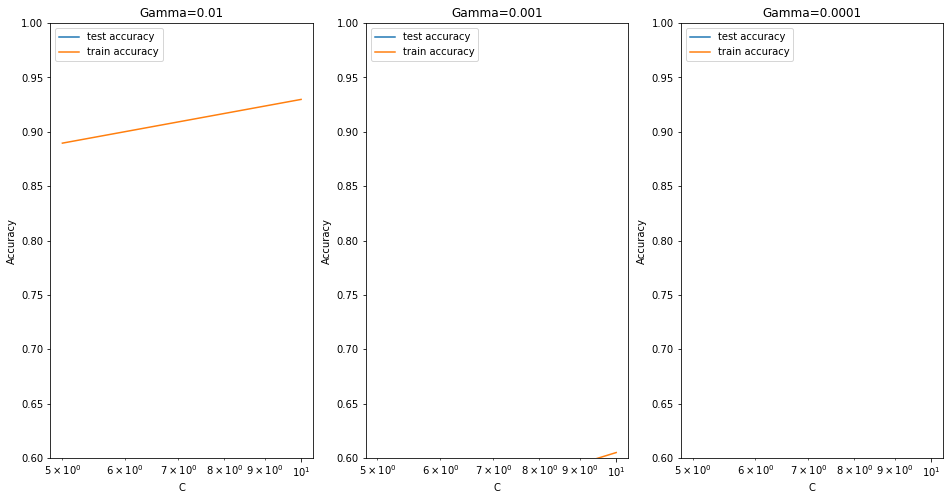

In [42]:
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,8))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [43]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.453960396039604 corresponding to hyperparameters {'C': 10, 'gamma': 0.01}


In [44]:
model = SVC(C=10, gamma=0.01, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")


accuracy 0.47112211221122113 

[[367  53  63   2  25  17  20   1  30  18]
 [ 61 335  76   1   4  13  18   3  32  28]
 [ 58  94 384   0   2   7  11   2  21  13]
 [  8   0   3 277  92  19  14 182   9  19]
 [ 35  10  15  45 274 128  38  11  29  42]
 [ 28  24  17  11 107 266 112   2  27  16]
 [ 33  19  22   7  50  97 235   6  97  38]
 [  4   3   6 253   7   6  13 166  38 107]
 [ 45  16  24   4  26  37 104  12 257  93]
 [ 23  10  26   3  28  37  52  40 103 294]] 

